In [703]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs

In [704]:
X,y = make_blobs(n_samples=100,n_features=2,centers=2)
y = y.reshape(y.shape[0],1)
m = X.shape[0]
n = X.shape[1]

(100, 2)
(100, 1)


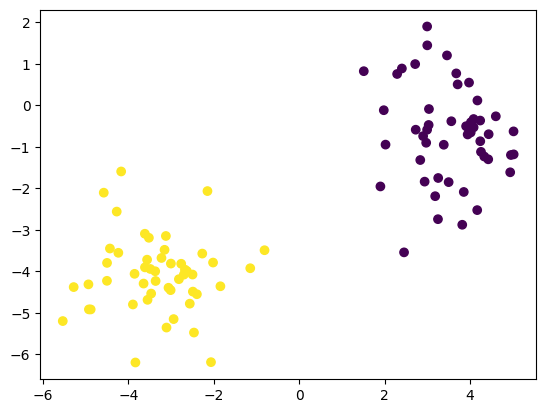

In [705]:
print(X.shape)
print(y.shape)
plt.scatter(X[:,0],X[:,1],c=y)

In [706]:
def sigmoid(Z):
    return 1/(1+np.exp(-Z))

In [707]:
def initialize(X):
    W = np.random.randn(X.shape[1],1)
    b = np.random.randn(1)
    return (W,b)

In [708]:
def model(X,W,b):
    Z = np.dot(X,W) + b
    return sigmoid(Z)

In [709]:
def log_loss(A,y):
    m = y.shape[0]
    return -1 / m * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))

In [710]:
def gradients(X,A,y):
    m = X.shape[0]
    dW = 1/m * np.dot(X.T,A-y)
    db = 1/m * np.sum(A-y)
    return (dW,db)

In [711]:
def update(W,b,dW,db,learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W,b)

In [712]:
def neuron(X,y,n_iter = 100,learning_rate = 0.1):
    W,b = initialize(X)
    J = []
    for i in range(n_iter):
        A = model(X,W,b)
        Loss = log_loss(A,y)
        J.append(Loss)
        dW, db = gradients(X,A,y)
        W,b = update(W,b,dW,db,learning_rate=learning_rate)
    plt.plot(J)
    return (W,b)

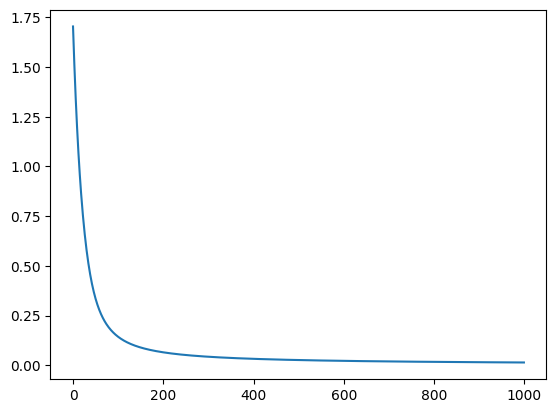

In [713]:
W,b = neuron(X,y,n_iter=1000,learning_rate=0.01)